<h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">SUPERVISED LEARNING REGRESSION MINI PROJECT </h1>
     


In [48]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from warnings import filterwarnings
filterwarnings('ignore')

import statsmodels.api as sm

pd.set_option('max.columns', None)

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score

<h2 class="list-group-item list-group-item-action active" >1. Read the dataset likes.csv </h2>

In [49]:
df = pd.read_csv('likes.csv')

In [50]:
df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,1098638,13,2,2000,2,male,0,0,0,1,0,0,0,1,0
1,2063204,14,22,1999,1,male,104,0,0,1,0,0,0,1,0
2,1579594,19,18,1994,10,female,212,0,0,1,0,0,0,1,0
3,1979672,21,1,1992,1,male,328,0,0,1,0,0,0,1,0
4,1344831,23,10,1990,2,male,580,0,0,1,0,0,0,1,0


In [51]:
df.shape

(2104, 15)

<h2 class="list-group-item list-group-item-action active" >2. Basic EDA to understand dataset </h2>

>### 1.  Select more than five columns for EDA

 Step1: Each plot must Use the subplots 
 
             Plot 1: Histogram or bar, line and use suitable plots
             
             Plot2: Box plot 
             
 Step2: Write the inference is it data skewed or not

 Step3: Write the inference is it data having  outliers  or not



>### 2.  Plot the heat map 
             
  Step1: Write the inference on the dependent variable and independent variable having the most (Positive and Negative) correlation columns 


  Step2: Write the inference on the correlation among independent variables

In [52]:
# Check datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2104 entries, 0 to 2103
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   userid                 2104 non-null   int64 
 1   age                    2104 non-null   int64 
 2   dob_day                2104 non-null   int64 
 3   dob_year               2104 non-null   int64 
 4   dob_month              2104 non-null   int64 
 5   gender                 2102 non-null   object
 6   tenure                 2104 non-null   int64 
 7   friend_count           2104 non-null   int64 
 8   friendships_initiated  2104 non-null   int64 
 9   likes                  2104 non-null   int64 
 10  likes_received         2104 non-null   int64 
 11  mobile_likes           2104 non-null   int64 
 12  mobile_likes_received  2104 non-null   int64 
 13  www_likes              2104 non-null   int64 
 14  www_likes_received     2104 non-null   int64 
dtypes: int64(14), object(

In [53]:
# Check column headings

df.columns

Index(['userid', 'age', 'dob_day', 'dob_year', 'dob_month', 'gender', 'tenure',
       'friend_count', 'friendships_initiated', 'likes', 'likes_received',
       'mobile_likes', 'mobile_likes_received', 'www_likes',
       'www_likes_received'],
      dtype='object')

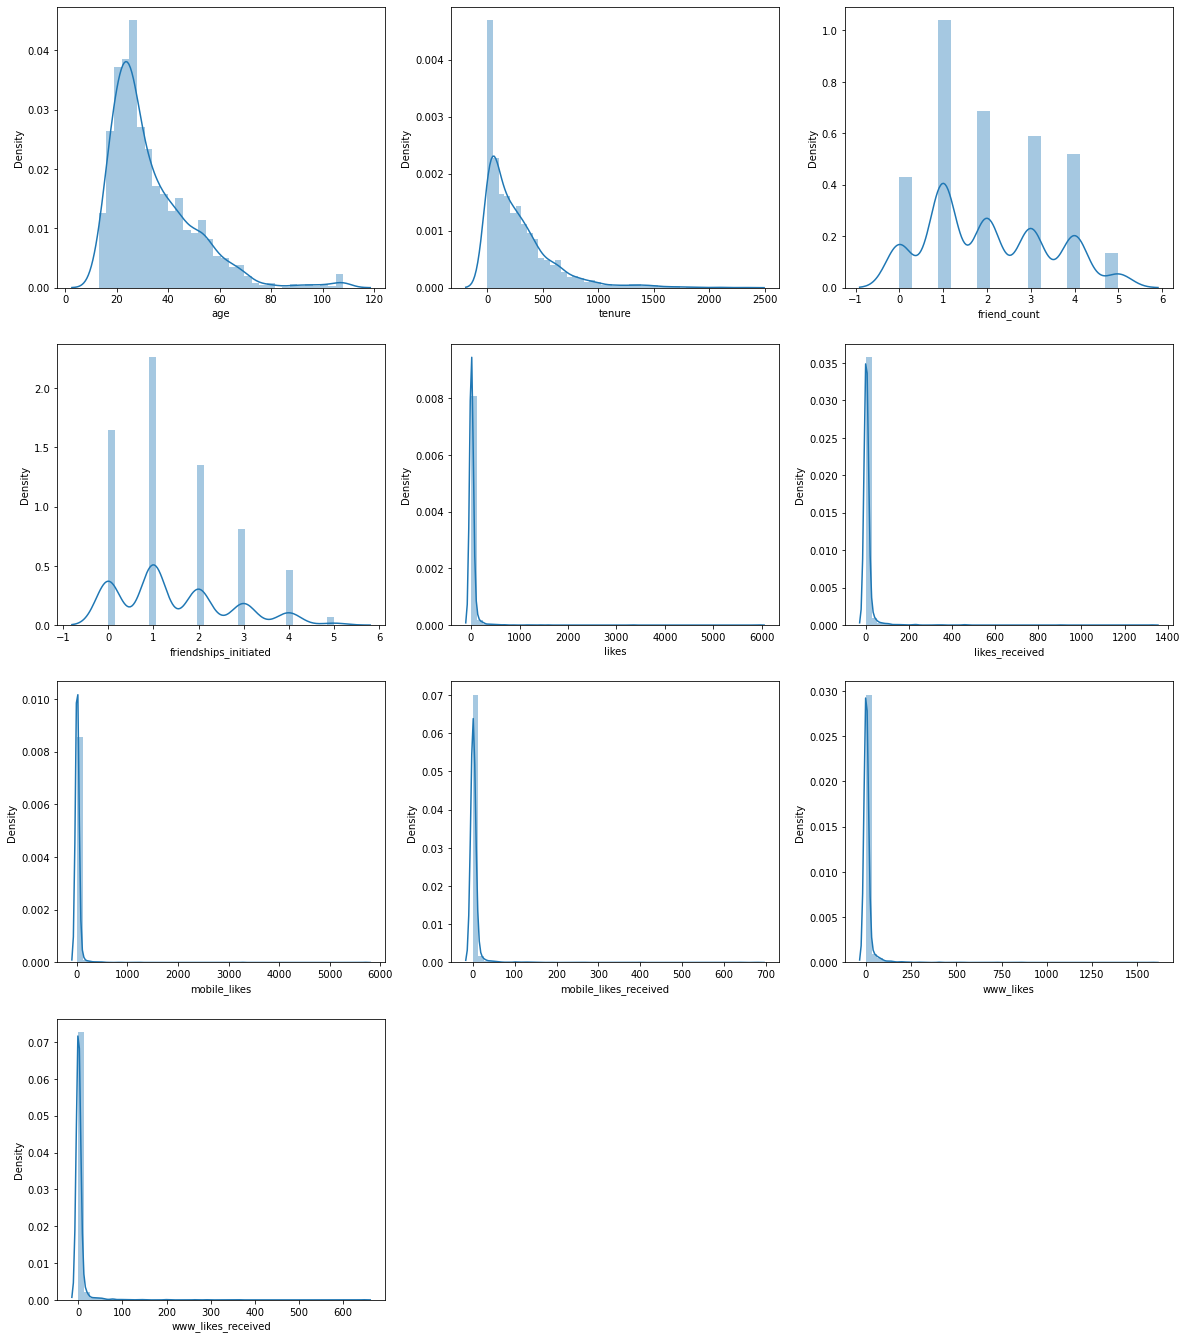

In [54]:
# plotting histogram 


cols = ['age','tenure','friend_count', 'friendships_initiated','likes','likes_received','mobile_likes', 'mobile_likes_received', 'www_likes','www_likes_received']

plt.figure(figsize = (20,30))

for i in range(1,len(cols)+1):
    plt.subplot(5,3,i)
    sns.distplot(df[cols[i-1]])
    
plt.show()

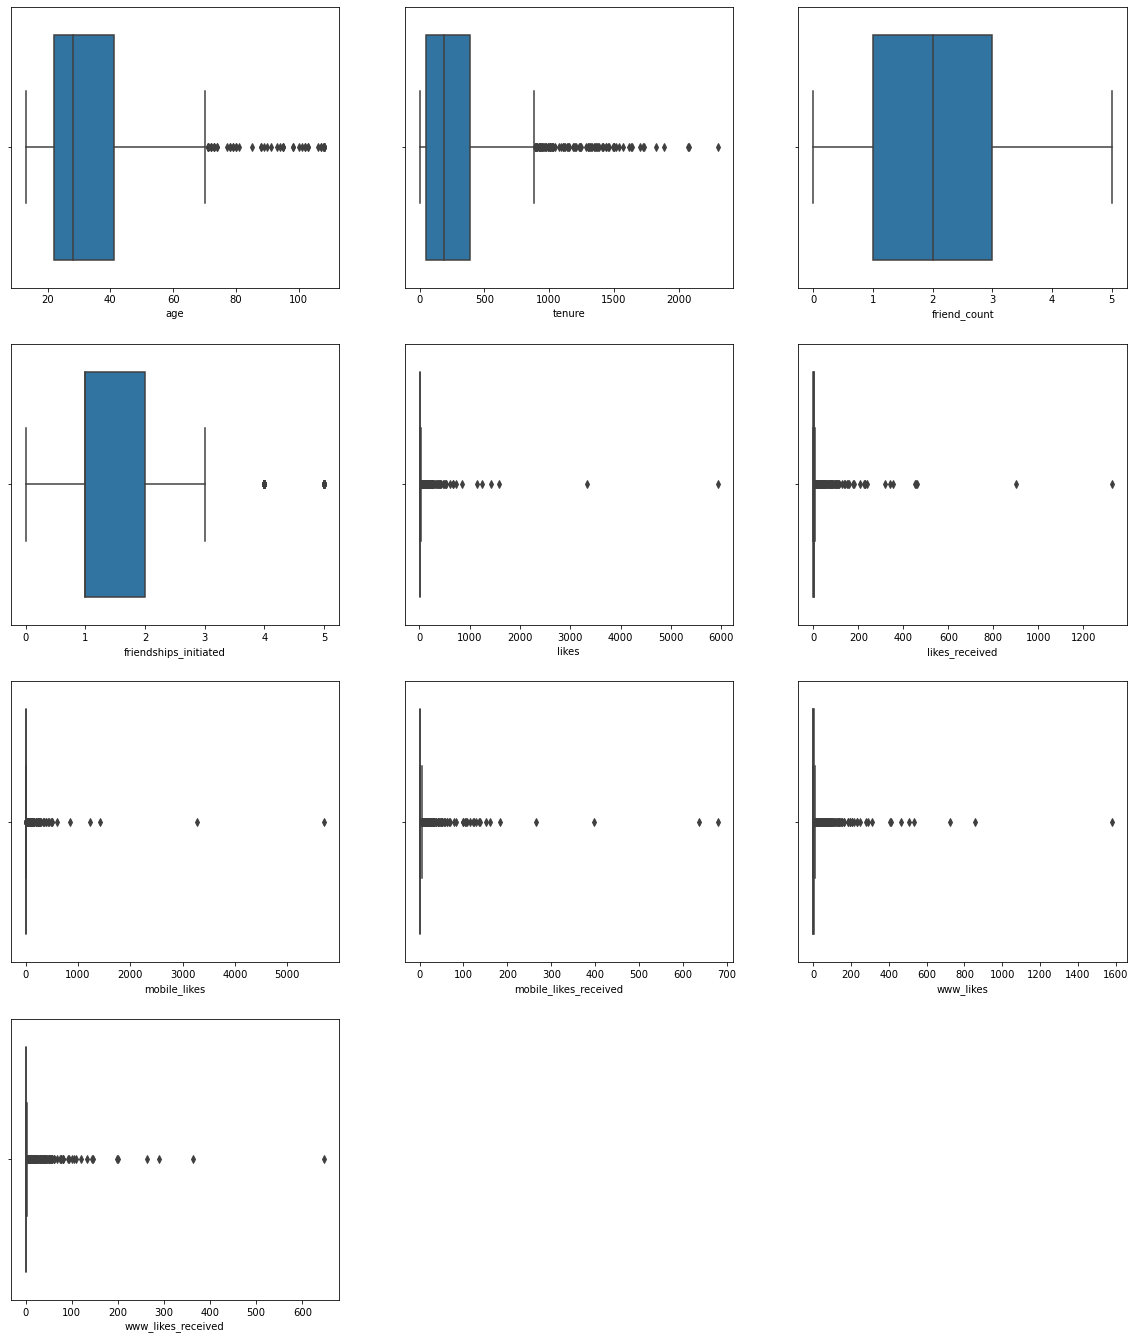

In [55]:
#Box plot 

plt.figure(figsize = (20,30))

for i in range(1,len(num_cols)+1):
    plt.subplot(5,3,i)
    sns.boxplot(df[num_cols[i-1]])
    
plt.show()

In [ ]:
#'age', 'tenure', 'likes', 'likes_received', 'mobile_likes', 'mobile_likes_received', 
#'www_likes','www_likes_received' are right skewed.

#All columns except for friend count have outliers.

### Q2. Plot the heat map

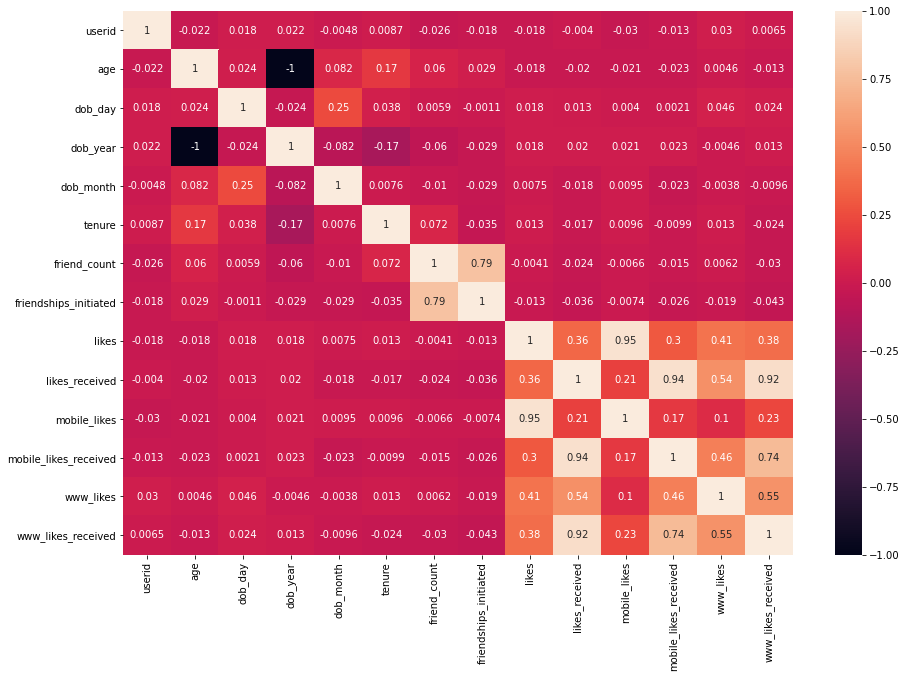

In [56]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True)
plt.show()

#### Step1: Write the inference on the dependent variable and independent variable having the most (Positive and Negative) correlation columns

According to the heatmap:
mobile likes has the strongest positive linear correlation with 'likes'
friendships initiated has the highest negative linear correlation with 'likes' but this is a very weak relationship
www_likes has a moderate positive linear correlation with 'likes'
likes_received, mobile_likes_received and www_likes_received have weak positive linear correlation with 'likes'

#### Step 2: Write the inference on the correlation among independent variables

According to the heatmap:
friend_count has a strong positive correlation with friendships_initiated
likes_received has a strong positive correlation with www_likes_received
dob_year has a perfect negative linear correlation with age

## Other Basic EDA steps

### Missing value treatment

In [57]:
df.isnull().sum()

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   2
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

In [58]:
df.dropna(inplace = True)

In [59]:
df.isnull().sum()

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

## Drop redundant features 

In [60]:
df.columns

Index(['userid', 'age', 'dob_day', 'dob_year', 'dob_month', 'gender', 'tenure',
       'friend_count', 'friendships_initiated', 'likes', 'likes_received',
       'mobile_likes', 'mobile_likes_received', 'www_likes',
       'www_likes_received'],
      dtype='object')

In [61]:
df.drop(['dob_year','userid',], axis = 1, inplace = True, errors = 'ignore')

## Transformation

In [63]:
pt = PowerTransformer()

df['t_age'] = stats.boxcox(df['age'])[0]
df['t_tenure'] = pt.fit_transform(df[['tenure']])

print(df['t_age'].skew())
print(df['t_tenure'].skew())

df.drop(['age','tenure'], axis = 1 ,inplace = True, errors = 'ignore')

0.03741522705033278
-0.09015286447305781


In [64]:
df['t_mobile_likes'] = pt.fit_transform(df[['mobile_likes']])
df['t_www_likes'] = pt.fit_transform(df[['www_likes']])

print(df['t_mobile_likes'].skew())
print(df['t_www_likes'].skew())

df.drop(['t_mobile_likes','t_www_likes'], axis = 1 ,inplace = True, errors = 'ignore')

0.26597892191676303
0.5588164760898076


In [65]:
df['t_likes'] = stats.boxcox(df['likes'])[0]

print(df['t_likes'].skew())

df.drop(['likes'], axis = 1 ,inplace = True, errors = 'ignore')

0.1872666538571965


## Remove Outliers

In [66]:
def remove_outliers(df,i):

    # calculate the first quartile
    Q1 = df[i].quantile(0.25)

    # calculate the third quartile
    Q3 = df[i].quantile(0.75)

    # calculate IQR for the given numeric variable
    IQR = Q3 - Q1

    df_new = df[~((df[i] < (Q1 - 3 * IQR)) | (df[i] > (Q3 + 3 * IQR)))]
    
    return df_new 

In [67]:
outlier_treatment_cols = ['mobile_likes','mobile_likes_received', 'www_likes', 'www_likes_received']

for i in outlier_treatment_cols:
    df = remove_outliers(df,i)

In [68]:
df.shape

(1168, 12)

<h2 class="list-group-item list-group-item-action active" >3.Split dataset into train and test,Scaling    </h2>

>### 1. Split the dataset in dependent variable is [`likes`] and independent

>### 2. Convert categorical variables to numeric variables

>### 3. Scale the features 

>### 4. Split dataset into train(70%) and test(30%).How would you ascertain this statistically? 
 

1. Split the dataset in dependent variable is [likes] and independent

In [69]:
X = df.drop('t_likes', axis = 1)
y = df['t_likes']

In [70]:
print(X.shape)

(1168, 11)


In [71]:
print(y.shape)

(1168,)


2. Convert categorical variables to numeric variables

In [72]:
cat_cols = df.select_dtypes(object).columns
X_cat_encoded = pd.get_dummies(df[cat_cols], drop_first=True)
X_cat_encoded.shape

(1168, 1)

In [73]:
X_cat_encoded.head(2)

,gender_male
0,1
1,1


3. Scale the features

In [74]:
num_cols = X.select_dtypes(np.number).columns

mms = MinMaxScaler()

X_scaled = pd.DataFrame(mms.fit_transform(X[num_cols]), columns = num_cols)
X_scaled.shape

(1168, 10)

In [75]:
X_scaled.reset_index(inplace=True, drop = True)
X_cat_encoded.reset_index(inplace=True, drop = True)

X_final = pd.concat([X_scaled,X_cat_encoded], axis=1)
X_final.tail()

,dob_day,dob_month,friend_count,friendships_initiated,mobile_likes,mobile_likes_received,www_likes,www_likes_received,boxcox_age,tenure_transformed,gender_male
1163,0.600000,0.909091,1.0,0.8,0.041667,0.25,0.0,0.0,0.880992,0.527189,0
1164,0.266667,1.000000,1.0,0.8,0.041667,0.50,0.0,0.0,0.251700,0.577306,0
1165,0.400000,0.181818,1.0,0.4,0.041667,0.50,0.0,0.0,0.251700,0.525447,1
1166,0.666667,0.272727,1.0,0.2,0.041667,1.00,0.0,0.0,0.251700,0.144469,1
1167,0.100000,0.272727,1.0,1.0,0.041667,0.75,0.0,0.0,0.282686,0.388584,1


In [76]:
y_final = mms.fit_transform(pd.DataFrame(y))

4. Split dataset into train(70%) and test(30%).How would you ascertain this statistically?

In [77]:
X_train,X_test, y_train, y_test = train_test_split(X_final,y_final,test_size=0.3, random_state=42) 

print('Shape of X_train:',X_train.shape)
print('Shape of X_test:',X_test.shape)
print('Shape of y_train:',y_train.shape)
print('Shape of y_test:',y_test.shape)

Shape of X_train: (817, 11)
Shape of X_test: (351, 11)
Shape of y_train: (817, 1)
Shape of y_test: (351, 1)


<h2 class="list-group-item list-group-item-action active" >4.Model Building and Feature Selection using RFE(Recursive feature elimination)   </h2>

>### 1. Use Linear Regression

>### 2. Evaluation metrics like Rsqaure,Standard error/RMSE. Write the inference.

>### 3. Feature selection using RFE

Step1: Check the optimal number of features between 4 to 30

Step2: RFE with n features(LinearRegression) 

Step3: Specify the number of features

Step4: Fit with n features

Step5: Select features selected by rfe_n      

Step6:Training & test data for n selected columns        

Step7: Add a constant to the model       

Step8:Fit the ols model with n features

Step9: Calculate evaluation metrics

Step 10: Plot r2 and RMSE against n_features  

Step11: Write your final inference.    




>### 4. Model Bulding with optimal features count



## Solutions

1. Use Linear Regression

In [78]:
y_train = list(y_train)

X_trainc = sm.add_constant(X_train)

lr_model = sm.OLS(y_train,X_trainc).fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     239.1
Date:                Tue, 04 Jan 2022   Prob (F-statistic):          2.33e-233
Time:                        18:41:49   Log-Likelihood:                 364.77
No. Observations:                 817   AIC:                            -707.5
Df Residuals:                     806   BIC:                            -655.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0759      0.024      3.125      0.002       0.028       0.124
dob_day                   0.0466      0.019      2.496      0.013       0.010       0.083
dob_month                 0.0181      0.017      1.083      0.279      -0.015       0.051
friend_count             -0.0653      0.032     -2.033      0.042      -0.128      -0.002
friendships_initiated     0.0288      0.037      0.787      0.432      -0.043       0.101
mobile_likes              1.5072      0.034     44.012      0.000       1.440       1.574
mobile_likes_received     0.1205      0.025      4.858      0.000       0.072       0.169
www_likes                 0.7404      0.033     22.569      0.000       0.676       0.805
www_likes_received    -3.031e-16   8.28e-17     -3.659      0.000   -4.66e-16    -1.4e-16
boxcox_age                0.0249      0.027      0.926      0.355      -0.028       0.078
tenure_transformed       -0.0466      0.030     -1.572      0.116      -0.105       0.012
gender_male              -0.0307      0.012     -2.530      0.012      -0.055      -0.007
==============================================================================
Omnibus:                        8.173   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                7.008
Skew:                          -0.157   Prob(JB):                       0.0301
Kurtosis:                       2.672   Cond. No.                     2.89e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.58e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [79]:
lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

y_train_pred = lr_model.predict(X_train)

y_test_pred = lr_model.predict(X_test)

2. Evaluation metrics like Rsqaure,Standard error/RMSE. Write the inference.

In [81]:
results = pd.DataFrame({'R2 Score': [r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred)], 
                        'RMSE': [np.sqrt(mean_squared_error(y_train,y_train_pred)),
                                 np.sqrt(mean_squared_error(y_test,y_test_pred))]},
                      index = ['Model 1: Train set','Model 1: Test set'])
results

,R2 Score,RMSE
Model 1: Train set,0.747921,0.154832
Model 1: Test set,0.753496,0.149828


3. Feature selection using RFE

In [83]:
r2_scores_train = []
r2_scores_test = []
rmse_values_train = []
rmse_values_test = []

# add constant
X_trainc = sm.add_constant(X_train)
X_testc = sm.add_constant(X_test)

for i in range(4,31):
    rfe_1 = RFE(estimator=LinearRegression(),n_features_to_select=i)
    rfe_1.fit(X_train,y_train)
    feature_ranks = pd.Series(rfe_1.ranking_, index = X_train.columns)
    selected_features = feature_ranks[feature_ranks==1].index
    
    # run the model
    
    lr_model = sm.OLS(y_train,X_trainc[selected_features]).fit()
                                      
    y_pred_train_rfe = lr_model.predict(X_trainc[selected_features]) 
    y_pred_test_rfe = lr_model.predict(X_testc[selected_features]) 
    
    # train
    r2_scores_train.append(r2_score(y_train,y_pred_train_rfe))
    rmse_values_train.append(np.sqrt(mean_squared_error(y_train,y_pred_train_rfe)))
    
    # test
    r2_scores_test.append(r2_score(y_test,y_pred_test_rfe))
    rmse_values_test.append(np.sqrt(mean_squared_error(y_test,y_pred_test_rfe)))

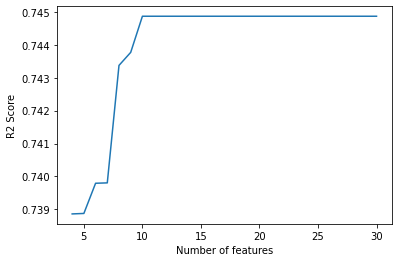

In [84]:
sns.lineplot(x = range(4,31), y = r2_scores_train)

plt.ylabel('R2 Score')
plt.xlabel('Number of features')

plt.show()

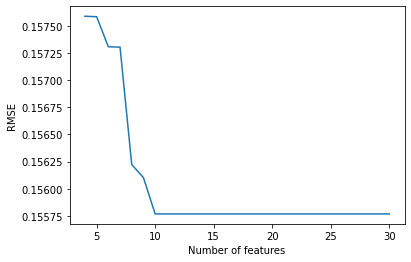

In [85]:
sns.lineplot(x = range(4,31), y = rmse_values_train)

plt.ylabel('RMSE')
plt.xlabel('Number of features')


plt.show()

<h2 class="list-group-item list-group-item-action active" >5.Linear Regression Assumptions Validation</h2>


>### 1. Linearity of the model
>### 2. Homoscedasticity (equal variance) of residuals
>### 3. Normality of residuals 
>### 4. Identifying Outliers/influential Cases

## 1. Linearity of the model

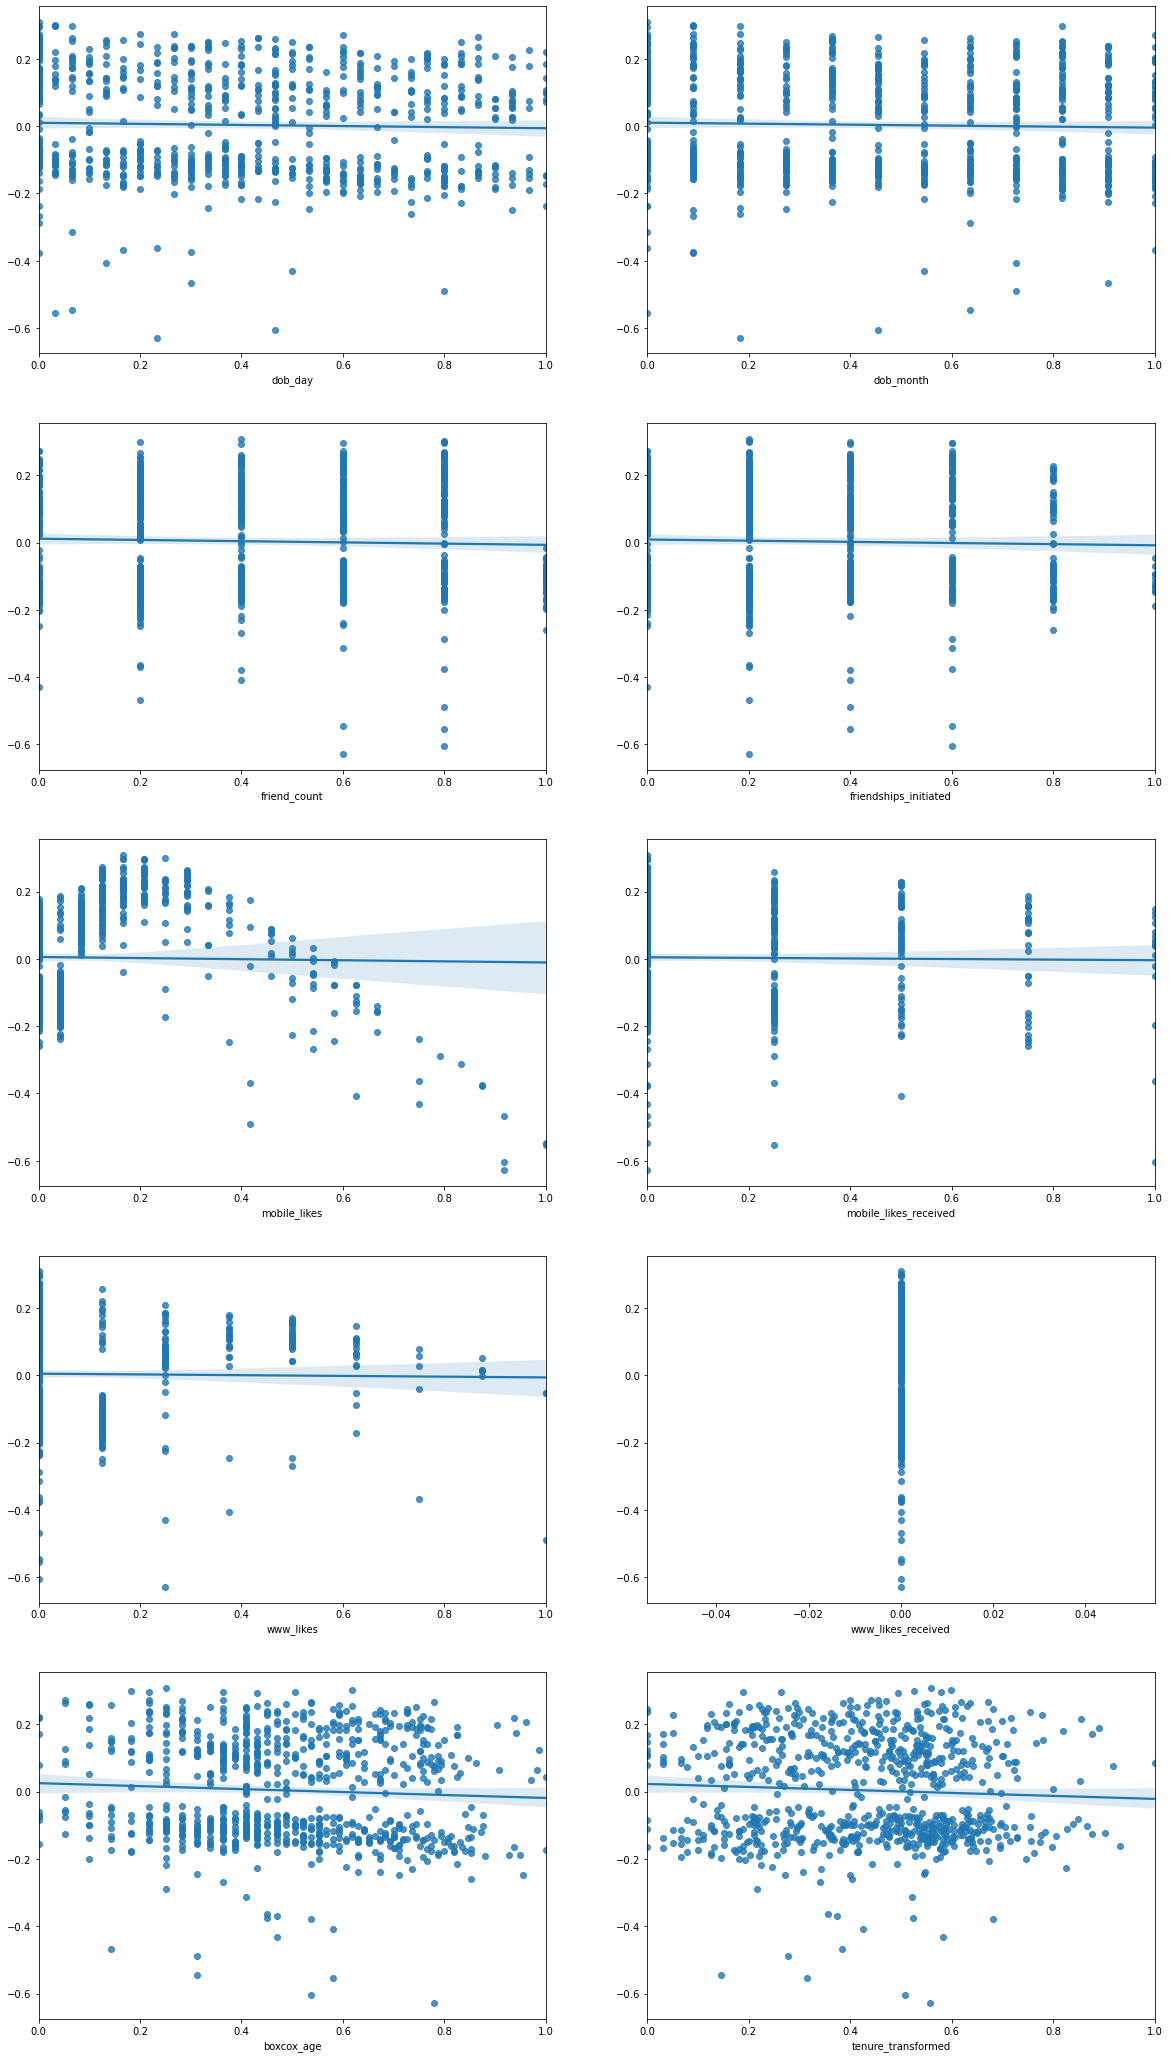

In [86]:
# residual plot of errors vs independent variables

residuals = lr_model.resid

df_features = X_train.select_dtypes(np.number)

plt.figure(figsize =(20,60))

for i in range(1,len(df_features.columns)):
    plt.subplot(8,2,i)
    sns.regplot(df_features[df_features.columns[i-1]], residuals)
    
plt.show()

There is no obvious pattern in the plots so we infer that the assumption of linearityis not violated.

## 2. Homoscedasticity (equal variance) of residuals

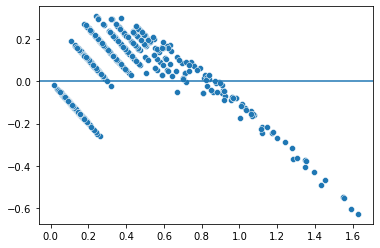

In [87]:
# Residual plot - fitted values vs error terms

fitted_values = lr_model.fittedvalues

sns.scatterplot(x = fitted_values, y = lr_model.resid)

plt.axhline()

plt.show()

The assumption of equal variance is violated.

## 3. Normality of residuals

-0.19161384907547874


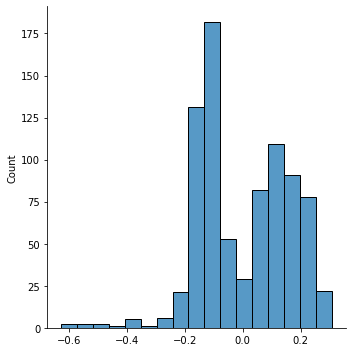

In [88]:
sns.displot(residuals)

print(residuals.skew())

plt.show()

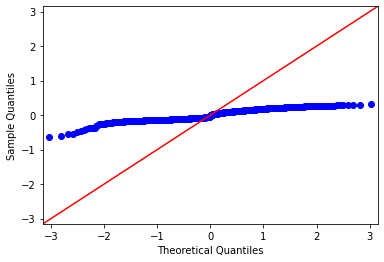

In [89]:
## qq plot

plt.show(sm.qqplot(residuals, line = '45'))

In [90]:
# The qqplot shows that the errors do deviate from normal distribution

In [91]:
# shapiro test

stats.shapiro(residuals)

ShapiroResult(statistic=0.9386473894119263, pvalue=7.58375481046683e-18)

## 4. Identifying Outliers/influential Cases

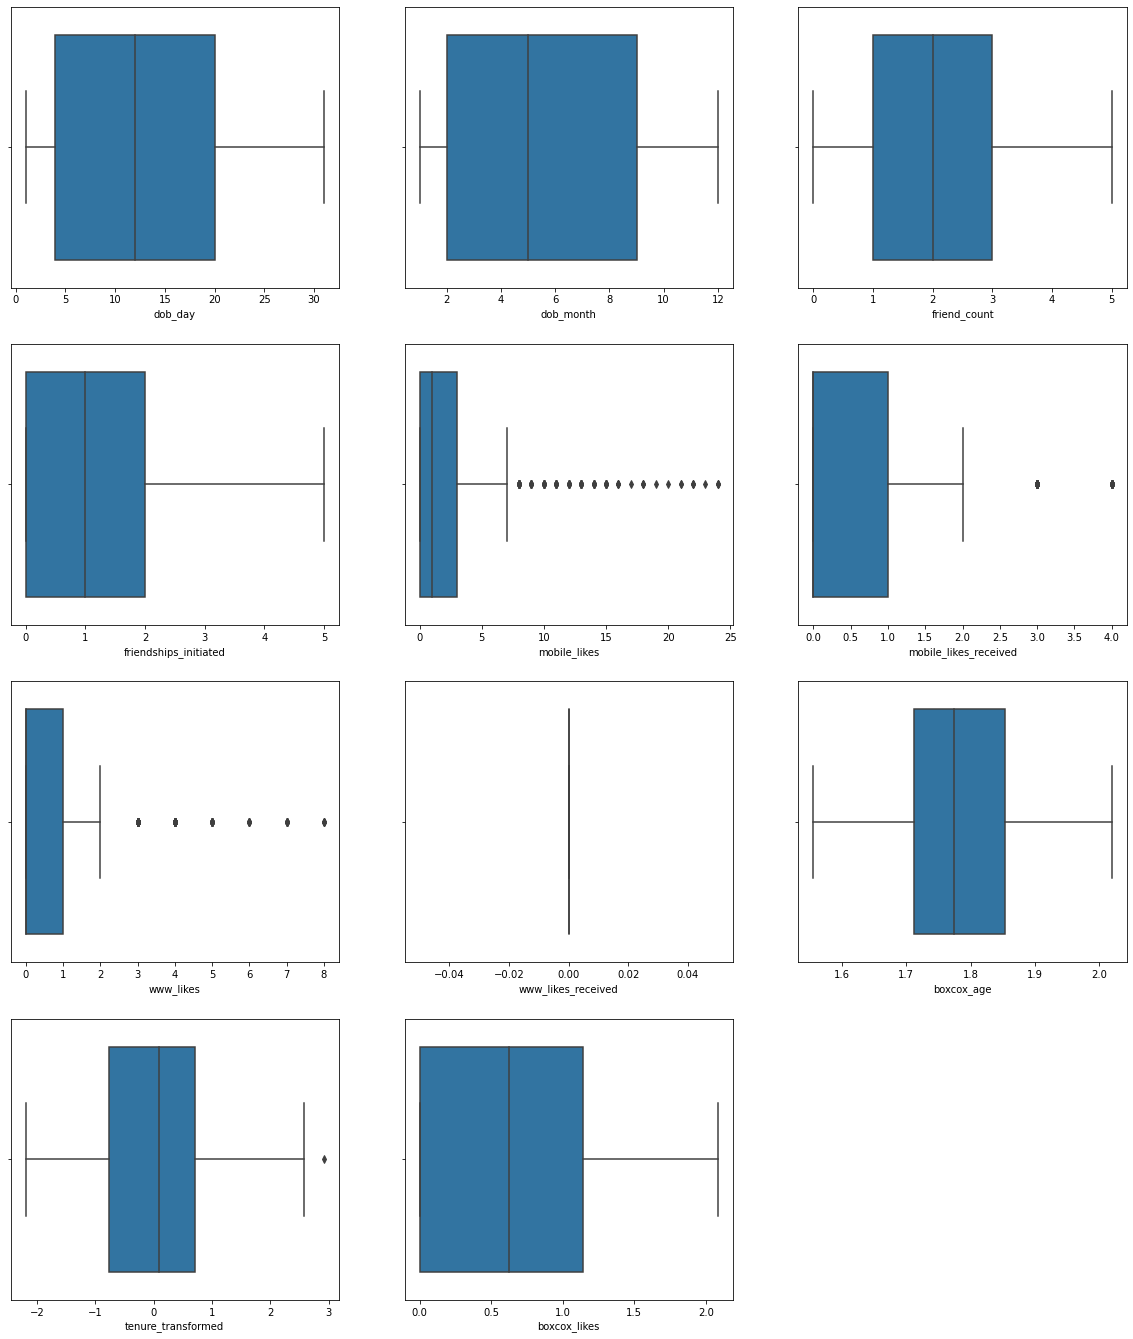

In [92]:
# plotting box plot to identify outliers

plt.figure(figsize = (20,30))

num_cols = df.select_dtypes(np.number).columns

for i in range(1,len(num_cols)+1):
    plt.subplot(5,3,i)
    sns.boxplot(df[num_cols[i-1]])
    
plt.show()

<h2 class="list-group-item list-group-item-action active" >6.Rebuilding the Model: Feature Selection using RFE & K-Fold Cross Validation</h2>


>### A. Finding optimal feature count using RFE and plot the r2 and RMSE against n_features.

>### B. K-Fold Cross Validation

## B. K-Fold Cross Validation

In [93]:
scores = cross_val_score(estimator = LinearRegression(),X= X_train, y = y_train, cv = 5, scoring = 'r2')

In [94]:

print('All scores: ', scores)


print("\nMinimum score obtained: ", round(min(scores), 4))


print("Maximum score obtained: ", round(max(scores), 4))
 
print("Average score obtained: ", round(np.mean(scores), 4))

All scores:  [0.72156323 0.7797711  0.72477546 0.69505638 0.73410461]

Minimum score obtained:  0.6951
Maximum score obtained:  0.7798
Average score obtained:  0.7311
